In [28]:
import sys
import os
import sys
import os
import pandas as pd
import numpy as np
from sklearn import linear_model, datasets
from math import log

from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Import functions
sys.path.append(os.path.abspath('../src/data'))
from extract_for_model import extract_time_series

import matplotlib.pyplot as plt

import time
sys.path.append(os.path.abspath('../src/models'))
from test_harness import fit_model
from test_harness import get_models

#importing our function for splitting the data and an additional cross validation function,
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.model_selection import cross_val_score
import math

import statsmodels.api as sm

#Allows us access to Scikit-learn linear regression model,
import sklearn.metrics
from sklearn.linear_model import LinearRegression


In [2]:
new_features=pd.read_csv('/home/paloma_pivigo/dataframe_slopes_for_features.csv')


In [3]:
new_features.head()

,Unnamed: 0,company,prediction_EBIT,real_value_EBIT,slope_EBIT,intercept_x,year,n_years_model_x,residuals_EBIT,prediction_TOTAL_OPER,...,n_years_model_x.1,residuals_OPER_INC,IQ_OPER_INC,prediction_TOTAL_REV,real_value_TOTAL_REV,slope_TOTAL_REV,intercept_y.1,n_years_model_y.1,residuals_TOTAL_REV,IQ_TOTAL_REV
0,0,IQ10127723,1.644333,1.199000,0.3910,-787.393667,2018,4,0.445333,4.508000,...,4,0.445333,1.691000,6.340667,7.379000,0.936000,-1882.507333,4,-1.038333,5.84100
1,1,IQ10348973,3.871000,0.980000,0.5618,-1129.841400,2018,6,2.891000,11.483700,...,6,2.891000,3.543000,26.972200,24.316000,2.299200,-4612.813400,6,2.656200,25.57900
2,2,IQ104606736,-72.860500,-103.283000,-18.2853,36826.874900,2018,6,30.422500,381.195500,...,6,30.422500,-74.577000,450.295000,392.008000,67.936600,-136645.763800,6,58.287000,355.85600
3,3,IQ105654219,-0.119233,-0.337406,-0.0149,29.949976,2018,6,0.218173,5.633652,...,6,0.218173,-0.539657,8.592851,8.416115,0.803968,-1613.814573,6,0.176736,8.18891
4,4,IQ105664079,18.109333,9.786000,4.8565,-9782.307667,2018,4,8.323333,35.353667,...,4,8.323333,10.075000,53.633667,57.709000,7.808000,-15702.910333,4,-4.075333,44.55800


In [4]:
new_features.describe()

,Unnamed: 0,prediction_EBIT,real_value_EBIT,slope_EBIT,intercept_x,year,n_years_model_x,residuals_EBIT,prediction_TOTAL_OPER,real_value_TOTAL_OPER,...,n_years_model_x.1,residuals_OPER_INC,IQ_OPER_INC,prediction_TOTAL_REV,real_value_TOTAL_REV,slope_TOTAL_REV,intercept_y.1,n_years_model_y.1,residuals_TOTAL_REV,IQ_TOTAL_REV
count,261.00000,261.000000,261.000000,261.000000,261.000000,261.0,261.000000,261.000000,261.000000,261.000000,...,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,130.00000,5.136722,5.308313,-0.242037,493.567345,2018.0,5.448276,-0.171592,57.892543,56.535074,...,5.448276,-0.171592,6.194562,116.932572,122.542273,7.028649,-14066.881236,5.448276,-5.609701,109.588150
std,75.48841,78.855927,80.234063,13.091863,26361.179461,0.0,1.020090,12.434242,249.691197,214.220737,...,1.020090,12.434242,63.201925,638.959130,695.499064,31.217170,62479.053668,1.020090,74.323466,599.529078
min,0.00000,-347.262800,-377.298000,-148.378000,-190800.572600,2018.0,2.000000,-120.966895,-26.179744,-14.280507,...,2.000000,-120.966895,-94.496000,-91.302523,1.031074,-102.228819,-812370.336200,2.000000,-925.459500,0.150000
25%,65.00000,-0.823784,-0.976000,-0.247866,-1389.032956,2018.0,5.000000,-1.354892,5.604366,5.775000,...,5.000000,-1.354892,-0.763045,8.021600,8.550000,0.179130,-9971.701953,5.000000,-4.024344,7.581297
50%,130.00000,0.345839,0.530890,0.026469,-52.286521,2018.0,6.000000,-0.158500,12.380188,12.407000,...,6.000000,-0.158500,0.410450,18.231823,18.391863,1.250381,-2513.364026,6.000000,-0.549093,16.797000
75%,195.00000,3.271302,2.860000,0.688604,499.332826,2018.0,6.000000,0.923700,29.615630,32.723030,...,6.000000,0.923700,2.727173,52.244000,51.776295,4.956639,-355.722169,6.000000,1.293821,47.570000
max,260.00000,1148.358600,1171.792000,95.118400,299079.541200,2018.0,6.000000,54.889200,3540.118700,2761.792000,...,6.000000,54.889200,951.921000,7408.665000,7877.221000,406.233400,206206.453411,6.000000,402.779332,6993.485000


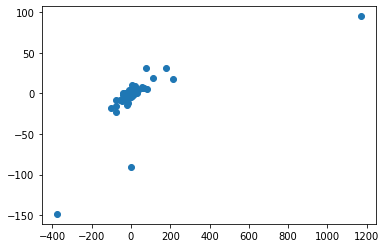

In [5]:
###create linear models using different sets of variables
#starting by Ebit+1 =slope_EBIT

plt.scatter(x=new_features['real_value_EBIT'], y=new_features['slope_EBIT'])
plt.show()

In [7]:
#get the features and divide to training set and test set
features_list='slope_EBIT'
target_feature='real_value_EBIT'

features_array=np.asarray(new_features.loc[:,features_list])    

target_column=np.asarray(new_features[target_feature])
features_train,features_test, target_train, target_test=train_test_split(features_array, target_column,
                                                                         test_size=0.2, random_state=0)

regr = linear_model.LinearRegression()

# Train the model using the training set
regr.fit(np.reshape(features_train,(-1,1)), target_train)

# Make predictions using the testing set
target_pred = regr.predict(np.reshape(features_test,(-1,1)))


# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(target_test, target_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(target_test, target_pred))

   

Coefficients: 
 [4.26002355]
Mean squared error: 427.42
Variance score: 0.58


In [8]:
#get the features and divide to training set and test set
features_list=['slope_EBIT','slope_OPER_INC']
target_feature='real_value_EBIT'

features_array=np.asarray(new_features.loc[:,features_list])    

target_column=np.asarray(new_features[target_feature])
features_train,features_test, target_train, target_test=train_test_split(features_array, target_column,
                                                                         test_size=0.2, random_state=0)

regr = linear_model.LinearRegression()

# Train the model using the training set
regr.fit(features_train, target_train)

# Make predictions using the testing set
target_pred = regr.predict(features_test)


# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(target_test, target_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(target_test, target_pred))

   

Coefficients: 
 [2.13001177 2.13001177]
Mean squared error: 427.42
Variance score: 0.58


In [18]:
#get the features and divide to training set and test set
features_list=['slope_EBIT','slope_TOTAL_OPER']
target_feature='real_value_EBIT'

features_array=np.asarray(new_features.loc[:,features_list])    

target_column=np.asarray(new_features[target_feature])
features_train,features_test, target_train, target_test=train_test_split(features_array, target_column,
                                                                         test_size=0.2, random_state=0)

regr = linear_model.LinearRegression()

# Train the model using the training set
regr.fit(features_train, target_train)

# Make predictions using the testing set
target_pred = regr.predict(features_test)


# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(target_test, target_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(target_test, target_pred))

   

Coefficients: 
 [6.25969111 2.04514008]
Mean squared error: 185.22
Variance score: 0.82


In [9]:
#get the features and divide to training set and test set
features_list=['slope_EBIT','slope_TOTAL_REV']
target_feature='real_value_EBIT'

features_array=np.asarray(new_features.loc[:,features_list])    

target_column=np.asarray(new_features[target_feature])
features_train,features_test, target_train, target_test=train_test_split(features_array, target_column,
                                                                         test_size=0.2, random_state=0)

regr = linear_model.LinearRegression()

# Train the model using the training set
regr.fit(features_train, target_train)

# Make predictions using the testing set
target_pred = regr.predict(features_test)


# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(target_test, target_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(target_test, target_pred))

   

Coefficients: 
 [3.35238738 1.48911937]
Mean squared error: 158.05
Variance score: 0.84


In [10]:
#get the features and divide to training set and test set
features_list=['slope_EBIT','slope_TOTAL_REV', 'slope_TOTAL_OPER']
target_feature='real_value_EBIT'

features_array=np.asarray(new_features.loc[:,features_list])    

target_column=np.asarray(new_features[target_feature])
features_train,features_test, target_train, target_test=train_test_split(features_array, target_column,
                                                                         test_size=0.2, random_state=0)

regr = linear_model.LinearRegression()

# Train the model using the training set
regr.fit(features_train, target_train)

# Make predictions using the testing set
target_pred = regr.predict(features_test)


# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(target_test, target_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(target_test, target_pred))

   

Coefficients: 
 [ 2.74890693  1.73827377 -0.46188765]
Mean squared error: 180.11
Variance score: 0.82


In [31]:
#get the features and divide to training set and test set
features_list=['slope_EBIT','IQ_OPER_INC', 'IQ_TOTAL_REV']
target_feature='real_value_EBIT'

features_array=np.asarray(new_features.loc[:,features_list])    

target_column=np.asarray(new_features[target_feature])
features_train,features_test, target_train, target_test=train_test_split(features_array, target_column,
                                                                         test_size=0.2, random_state=0)

regr = linear_model.LinearRegression()

# Train the model using the training set
regr.fit(features_train, target_train)

# Make predictions using the testing set
target_pred = regr.predict(features_test)

# calculate aic for regression
def calculate_aic(n, mse, num_params):
    aic = n * log(mse) + 2 * num_params
    return aic
 


# calculate the aic
aic = calculate_aic(len(target_train), mse, num_params)
print('AIC: %.3f' % aic)

# calculate bic for regression
def calculate_bic(n, mse, num_params):
    bic = n * log(mse) + num_params * log(n)
    return bic

model = LinearRegression()
model.fit(features_train, target_train)
# number of parameters
num_params = len(model.coef_) + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = model.predict(features_test)
# calculate the error
mse = mean_squared_error(target_test, yhat)
print('MSE: %.3f' % mse)
# calculate the bic
bic = calculate_bic(len(target_train), mse, num_params)
print('BIC: %.3f' % bic)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(target_test, target_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(target_test, target_pred))

   

AIC: 780.488
Number of parameters: 4
MSE: 41.013
BIC: 793.839
Coefficients: 
 [ 0.41653641  1.42005999 -0.04184787]
Mean squared error: 41.01
Variance score: 0.96


Number of parameters: 6
MSE: 27.038
BIC: 717.851
AIC: 697.826
Variance score: 0.96


Text(0.5, 1.0, 'Information-criterion for model selection (training time 0.005s)')

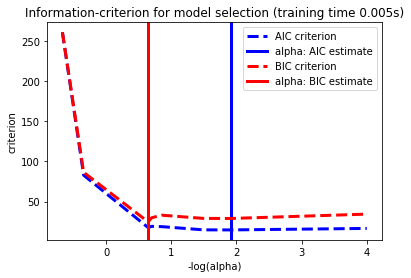

In [32]:
#get the features and divide to training set and test set
features_list=['slope_EBIT','IQ_OPER_INC', 'IQ_TOTAL_REV','slope_TOTAL_REV', 'slope_TOTAL_OPER']
target_feature='real_value_EBIT'
EPSILON = 1e-4
features_array=np.asarray(new_features.loc[:,features_list])    

target_column=np.asarray(new_features[target_feature])
features_train,features_test, target_train, target_test=train_test_split(features_array, target_column,
                                                                         test_size=0.2, random_state=0)


# calculate bic for regression
def calculate_bic(n, mse, num_params):
    bic = n * log(mse) + num_params * log(n)
    return bic

model = LinearRegression()
model.fit(features_train, target_train)
# number of parameters
num_params = len(model.coef_) + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = model.predict(features_test)
# calculate the error
mse = mean_squared_error(target_test, yhat)
print('MSE: %.3f' % mse)
# calculate the bic
bic = calculate_bic(len(target_train), mse, num_params)
print('BIC: %.3f' % bic)

# calculate the aic
aic = calculate_aic(len(target_train), mse, num_params)
print('AIC: %.3f' % aic)

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(target_test, target_pred))

  
model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(features_array, target_column)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_



model_aic=LassoLarsIC(criterion='aic')
model_aic.fit(features_array,target_column)
alpha_aic_=model_aic.alpha_

def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_ + EPSILON
    alphas_ = model.alphas_ + EPSILON
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s criterion' % name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection (training time %.3fs)'
          % t_bic)

